In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB

<h1>Load the Dataset</h1>

In [3]:
df = pd.read_csv('/Users/shreeyadaga/Documents/college/Sem6/DSBDA/DSBDALExam DataSets/DSBDALExam DataSets/Iris/Iris.csv', header=None, names=['sepal_length','sepal_width','petal_length','petal_width','class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [5]:
df.replace('?',np.nan, inplace=True)

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [7]:
df.dropna(axis=0, how='any', inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
numeric_cols = ['sepal_length','sepal_width','petal_length','petal_width']
df[numeric_cols] = df[numeric_cols].astype(float)
df = df[(df[numeric_cols] >= 0).all(axis=1)]
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


/var/folders/wg/h60t4_v56c1dm17m7q09c16m0000gn/T/ipykernel_7655/1458947841.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col])


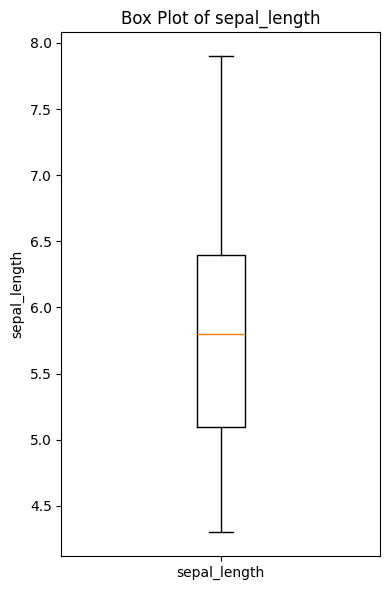

/var/folders/wg/h60t4_v56c1dm17m7q09c16m0000gn/T/ipykernel_7655/1458947841.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col])


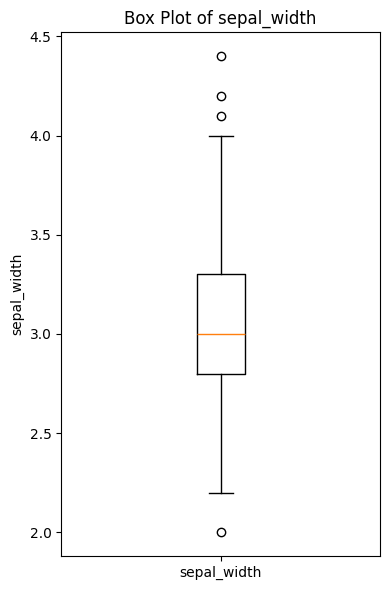

/var/folders/wg/h60t4_v56c1dm17m7q09c16m0000gn/T/ipykernel_7655/1458947841.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col])


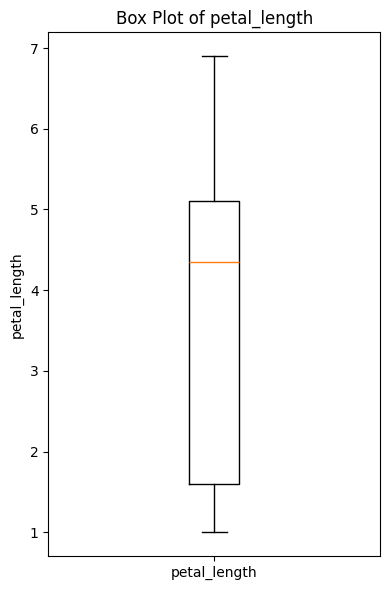

/var/folders/wg/h60t4_v56c1dm17m7q09c16m0000gn/T/ipykernel_7655/1458947841.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df[col], labels=[col])


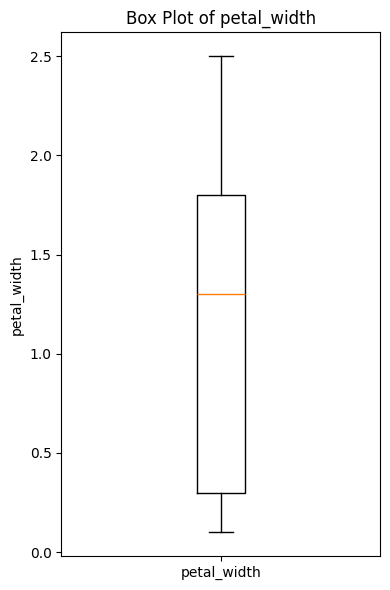

In [9]:

for col in numeric_cols:
    plt.figure(figsize=(4, 6))
    # Method A: using DataFrame.boxplot
    # df.boxplot(column=col)
    plt.boxplot(df[col], labels=[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.tight_layout()  # adjusts subplot parameters (marhins, paddings) so that axes labels, titles and tick labels don't overlap
    plt.show()

In [10]:
# Outlier Removal using IQR method
def remove_outliers_iqr(df, cols, factor=1.5):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor * IQR, Q3 + factor * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, numeric_cols)
print("After outlier removal:", df.shape)

After outlier removal: (146, 5)


In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,-0.910515,1.175789,-1.374878,-1.345899,Iris-setosa
1,-1.151122,-0.093924,-1.374878,-1.345899,Iris-setosa
2,-1.391729,0.413961,-1.431986,-1.345899,Iris-setosa
3,-1.512032,0.160019,-1.317771,-1.345899,Iris-setosa
4,-1.030819,1.429732,-1.374878,-1.345899,Iris-setosa
...,...,...,...,...,...
145,1.014339,-0.093924,0.795200,1.425441,Iris-virginica
146,0.533125,-1.363637,0.680985,0.897567,Iris-virginica
147,0.773732,-0.093924,0.795200,1.029536,Iris-virginica
148,0.412822,0.921846,0.909414,1.425441,Iris-virginica


In [13]:
encoder = LabelEncoder()
df['species_encoded'] = encoder.fit_transform(df['class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class,species_encoded
0,-0.910515,1.175789,-1.374878,-1.345899,Iris-setosa,0
1,-1.151122,-0.093924,-1.374878,-1.345899,Iris-setosa,0
2,-1.391729,0.413961,-1.431986,-1.345899,Iris-setosa,0
3,-1.512032,0.160019,-1.317771,-1.345899,Iris-setosa,0
4,-1.030819,1.429732,-1.374878,-1.345899,Iris-setosa,0
...,...,...,...,...,...,...
145,1.014339,-0.093924,0.795200,1.425441,Iris-virginica,2
146,0.533125,-1.363637,0.680985,0.897567,Iris-virginica,2
147,0.773732,-0.093924,0.795200,1.029536,Iris-virginica,2
148,0.412822,0.921846,0.909414,1.425441,Iris-virginica,2


In [14]:
X = df[numeric_cols]
y = df['species_encoded']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0])

In [18]:
accuracy_score(y_test, y_pred_lr)

0.9772727272727273

In [19]:
print(classification_report(y_test, y_pred_lr, target_names=["Iris-setosa","Iris-Versicolour","Iris-virginica"]))

                  precision    recall  f1-score   support

     Iris-setosa       1.00      1.00      1.00        17
Iris-Versicolour       1.00      0.91      0.95        11
  Iris-virginica       0.94      1.00      0.97        16

        accuracy                           0.98        44
       macro avg       0.98      0.97      0.97        44
    weighted avg       0.98      0.98      0.98        44



In [20]:
conf_lr = confusion_matrix(y_test, y_pred_lr)
print(f'confusion matrix: \n {conf_lr}')

confusion matrix: 
 [[17  0  0]
 [ 0 10  1]
 [ 0  0 16]]


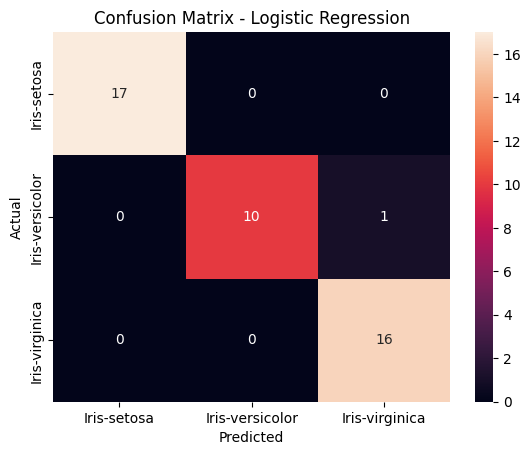

In [21]:
plt.figure()
sns.heatmap(conf_lr, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred_nb = naive.predict(X_test)
y_pred_nb

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0])

In [24]:
accuracy_score(y_test, y_pred_nb)

0.9545454545454546

In [25]:
print(classification_report(y_test, y_pred_nb, target_names=["Iris-setosa","Iris-Versicolour","Iris-virginica"]))

                  precision    recall  f1-score   support

     Iris-setosa       1.00      1.00      1.00        17
Iris-Versicolour       0.91      0.91      0.91        11
  Iris-virginica       0.94      0.94      0.94        16

        accuracy                           0.95        44
       macro avg       0.95      0.95      0.95        44
    weighted avg       0.95      0.95      0.95        44



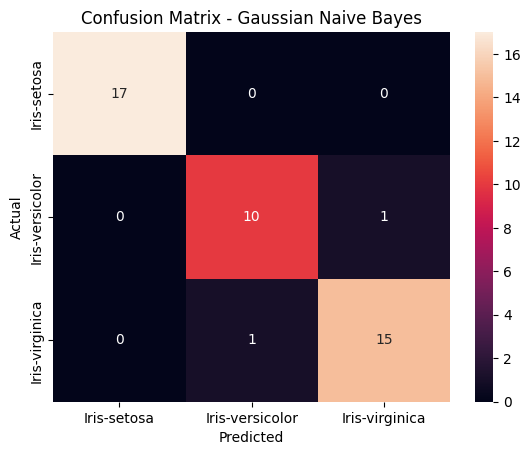

In [28]:
cm_gnb = confusion_matrix(y_test, y_pred_nb)
plt.figure()
sns.heatmap(cm_gnb, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()